### **Project: Bank Customer Segmentation & Targeted Marketing**

### Data Cleaning & Preprocessing

### Objective:
- Handle missing or inconsistent values
- Fix data types and formatting issues
- Detect and treat outliers
- Address skewness in key features
- Normalize or scale numerical variables
- Prepare a clean and well-structured dataset for modeling


#### Importing necessary libraries

In [86]:
import pandas as pd
import numpy as np
import os
import warnings 
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings('ignore')

In [87]:
df_raw = pd.read_csv('../data/raw/Bank_Customers_Dataset.csv')

In [88]:
df_raw.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [89]:
null_credit_limit_rows = df_raw[df_raw['CREDIT_LIMIT'].isnull()]
null_credit_limit_rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [90]:
df_raw['CREDIT_LIMIT'] = df_raw['CREDIT_LIMIT'].replace(['NA', 'null', '', ' '], np.nan)
df_raw = df_raw.dropna(subset=['CREDIT_LIMIT'])

In [91]:
df_raw['MINIMUM_PAYMENTS'] = df_raw['MINIMUM_PAYMENTS'].fillna(df_raw['PAYMENTS'].median())
df_raw['MINIMUM_PAYMENTS'].isnull().sum()

0

In [92]:
df_raw.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [93]:
def cap_outliers(df, features):
    summary = []
    for ft in features:
        Q1 = df[ft].quantile(0.25)
        Q3 = df[ft].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower_count = (df[ft] < lower_bound).sum()
        upper_count = (df[ft] > upper_bound).sum()

        df[ft] = np.where(df[ft] > upper_bound, upper_bound, np.where(df[ft] < lower_bound, lower_bound, df[ft]))
        summary.append({
            'Feature': ft,
            'Lower Capped': lower_count,
            'Upper Capped': upper_count,
            'Total Capped': lower_count + upper_count
        })
    summary_df = pd.DataFrame(summary).sort_values(by='Total Capped', ascending=False).reset_index(drop=True)
    return df, summary_df
outlier_features = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
    'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
]

In [94]:
df_cleaned, outlier_summary = cap_outliers(df_raw, outlier_features)
print(outlier_summary)

                       Feature  Lower Capped  Upper Capped  Total Capped
0            BALANCE_FREQUENCY          1492             0          1492
1             PRC_FULL_PAYMENT             0          1474          1474
2                 CASH_ADVANCE             0          1030          1030
3             ONEOFF_PURCHASES             0          1013          1013
4       INSTALLMENTS_PURCHASES             0           867           867
5                    PURCHASES             0           808           808
6                     PAYMENTS             0           808           808
7             CASH_ADVANCE_TRX             0           804           804
8   ONEOFF_PURCHASES_FREQUENCY             0           782           782
9             MINIMUM_PAYMENTS             0           780           780
10               PURCHASES_TRX             0           766           766
11                     BALANCE             0           695           695
12      CASH_ADVANCE_FREQUENCY             0       

#### Scale the Features
RobustScaler – handles remaining mild Or remaining outliers well

In [95]:
df_cleaned.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.000,0.0,2784.671635,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.170,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.722223,1499.00,1444.575,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,857.062706,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12


In [96]:
columns_to_drop = ['CUST_ID', 'ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY', 
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_scaled = df_cleaned.copy()

rs = RobustScaler()
rs.fit_transform(df_scaled)
df_scaled = rs.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432387,-1.636364,-0.248596,0.013656,0.000000,-0.277777,0.00,-0.3125,-0.408163,-0.431661,-0.285852,0.000000,0.0
1,1.209127,-0.818182,-0.337724,-0.189907,2.500000,-0.277777,1.00,-0.4375,0.816327,2.138325,1.073589,1.555556,0.0
2,0.841881,0.000000,0.384615,-0.189907,0.000000,2.222223,0.00,0.3125,0.918367,-0.154807,0.424997,0.000000,0.0
3,0.411728,-2.500000,1.062726,-0.189907,0.184751,0.000000,0.25,-0.3750,0.918367,-0.564601,0.759858,0.000000,0.0
4,-0.029058,0.000000,-0.322776,-0.189907,0.000000,0.000000,0.00,-0.3750,-0.367347,-0.117739,-0.132422,0.000000,0.0


In [97]:
df_transformed = df_scaled.copy()

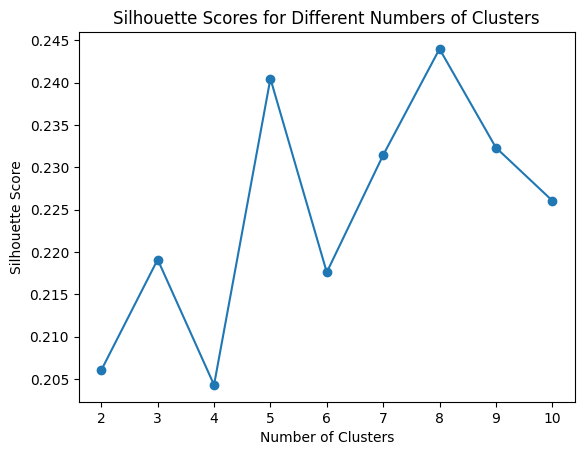

In [98]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(df_transformed)
    silhouette_scores.append(silhouette_score(df_transformed, clusters))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette Score: 0.22499394513088028
